# Import Necessary Libraries and Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [11]:
training_labels = pd.read_csv('Data/training_set_labels.csv', index_col='respondent_id')
training_features = pd.read_csv('Data/training_set_features.csv', index_col='respondent_id')

# Explore the Data

In [12]:
training_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [13]:
training_labels.seasonal_vaccine.value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [14]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [15]:
# Create one DataFrame to house all of our data
data_df = pd.concat([training_features, training_labels], axis=1)
data_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# Clean the Data

## Remove Unnecessary Columns

In [16]:
The columns that we are removing either have to do with the H1N1 Vaccine, or have too much missing data.

SyntaxError: invalid syntax (<ipython-input-16-9c1c1d77a75b>, line 1)

In [17]:
seasonal_df = data_df.drop(['h1n1_concern',
                            'h1n1_knowledge',
                            'health_insurance',
                            'opinion_h1n1_vacc_effective',
                            'opinion_h1n1_risk',
                            'opinion_h1n1_sick_from_vacc',
                            'doctor_recc_h1n1',
                            'employment_industry',
                            'employment_occupation',
                            'h1n1_vaccine'], axis=1)
seasonal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  opinion_seas_vacc_effective  26245 non-null  float64
 12  opinion_seas_risk            26193 non-null  float64
 13  opinion_seas_sic

## Dealing with Missing Data

In [18]:
# Check for missing data
seasonal_df.isna().sum()

behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
hhs_geo_region                    0
census_msa                        0
household_adults                249
household_children              249
seasonal_vaccine                  0
dtype: int64

We will want to create a new value for columns missing between 5 and 10 percent of the data.  If the column is missing less than 5 percent of data values, we will drop those values.

In [19]:
print('5% of data:', round(26707*.05, 2))
print('10% of data:', round(26707*.1, 2))

5% of data: 1335.35
10% of data: 2670.7


Create a new category "unknown" for the columns with 1000+ missing entries.
Drop rows if the column is missing less than 1000 entries.
Columns to adjust: doctor_recc_seasonal, education, income_poverty, marital_status, rent_or_own, and employment_status.

In [20]:
# Create an unknown category for missing data
need_new_category = ['doctor_recc_seasonal', 
                     'education', 
                     'income_poverty', 
                     'marital_status', 
                     'rent_or_own', 
                     'employment_status']
for column in need_new_category:
    seasonal_df[column].fillna(value='unknown', inplace=True)

In [21]:
# Check our remaining null values
seasonal_df.isna().sum()

behavioral_antiviral_meds       71
behavioral_avoidance           208
behavioral_face_mask            19
behavioral_wash_hands           42
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_touch_face          128
doctor_recc_seasonal             0
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
education                        0
race                             0
sex                              0
income_poverty                   0
marital_status                   0
rent_or_own                      0
employment_status                0
hhs_geo_region                   0
census_msa                       0
household_adults               249
household_children             249
seasonal_vaccine                 0
dtype: int64

In [22]:
# Drop the remaining null values from the dataset
seasonal_df.dropna(inplace=True)
seasonal_df.isna().sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
seasonal_vaccine               0
dtype: int64

In [23]:
# Split our data into features and labels
seasonal_features = seasonal_df.drop('seasonal_vaccine', axis=1)
seasonal_labels = seasonal_df['seasonal_vaccine']

In [24]:
seasonal_features.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,unknown,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,1.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


## Dummies for Categorical Columns

Next we need to create dummies for our columns that are not numerical.  Before we do this, I would like to adjust the doctor recc seasonal values in order for their column names to make sense when we create our dummies.

In [66]:
seasonal_features['doctor_recc_seasonal'].value_counts()

0.0        15494
1.0         7676
unknown     1856
Name: doctor_recc_seasonal, dtype: int64

In [25]:
# Replace 0 and 1 with No and Yes, respectively
seasonal_features['doctor_recc_seasonal'].replace(to_replace=0.0, value='No', inplace=True)
seasonal_features['doctor_recc_seasonal'].replace(to_replace=1.0, value='Yes', inplace=True)

In [26]:
# Create dummies for categorical columns
seasonal_final = pd.get_dummies(seasonal_features)

In [27]:
seasonal_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25026 entries, 0 to 26706
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   behavioral_antiviral_meds                 25026 non-null  float64
 1   behavioral_avoidance                      25026 non-null  float64
 2   behavioral_face_mask                      25026 non-null  float64
 3   behavioral_wash_hands                     25026 non-null  float64
 4   behavioral_large_gatherings               25026 non-null  float64
 5   behavioral_outside_home                   25026 non-null  float64
 6   behavioral_touch_face                     25026 non-null  float64
 7   chronic_med_condition                     25026 non-null  float64
 8   child_under_6_months                      25026 non-null  float64
 9   health_worker                             25026 non-null  float64
 10  opinion_seas_vacc_effective       

All of our data is now in a numerical format.  However, some of the dummy column names include spaces and unusual characters (ie >). We will have to rename these columns so they are usable in later code, namely for XG Boost models.

In [28]:
# Rename unusual columns
seasonal_final.rename(columns = {'age_group_18 - 34 Years' : 'age_group_18_34',
                            'age_group_35 - 44 Years' : 'age_group_35_44',
                            'age_group_45 - 54 Years' : 'age_group_45_54',
                            'age_group_55 - 64 Years' : 'age_group_55_64',
                            'age_group_65+ Years' : 'age_group_over_65',
                            'education_12 Years' : 'education_12_years',
                            'education_< 12 Years' : 'education_less_than_12',
                            'education_College Graduate' : 'education_college_grad',
                            'education_Some College': 'education_some_college',
                            'race_Other or Multiple' : 'race_other',
                            'income_poverty_<= $75,000, Above Poverty' : 'income_poverty_lessorequal_75k',
                            'income_poverty_> $75,000' : 'income_poverty_morethan_75k',
                            'income_poverty_Below Poverty' : 'income_poverty_below_poverty',
                            'marital_status_Not Married': 'marital_status_Unmarried',
                            'employment_status_Not in Labor Force' : 'employment_status_not_in_labor_force',
                            'census_msa_MSA, Not Principle  City' : 'census_msa_not_in_principle',
                            'census_msa_MSA, Principle City' : 'census_msa_in_principle',
                            'census_msa_Non-MSA' : 'census_msa_non_msa'},
                 inplace=True)

In [29]:
# Check column names
seasonal_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25026 entries, 0 to 26706
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   behavioral_antiviral_meds             25026 non-null  float64
 1   behavioral_avoidance                  25026 non-null  float64
 2   behavioral_face_mask                  25026 non-null  float64
 3   behavioral_wash_hands                 25026 non-null  float64
 4   behavioral_large_gatherings           25026 non-null  float64
 5   behavioral_outside_home               25026 non-null  float64
 6   behavioral_touch_face                 25026 non-null  float64
 7   chronic_med_condition                 25026 non-null  float64
 8   child_under_6_months                  25026 non-null  float64
 9   health_worker                         25026 non-null  float64
 10  opinion_seas_vacc_effective           25026 non-null  float64
 11  opinion_seas_ri

## Splitting the Data

Now we are ready to perform a train test split on our data so that we can create models and test their performance.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(seasonal_final, 
                                                    seasonal_labels, 
                                                    test_size = .25, 
                                                    random_state = 42)

In [32]:
y_train.value_counts()

0    9991
1    8778
Name: seasonal_vaccine, dtype: int64

The counts for a positive vs a negative result are close enough to where we do not need to perform any functions to deal with a class imbalance.

# Creating Models

For our baseline model, we will be using simple logistic regression.  After finding our baseline, we will use more advanced model techniques and grid searches to create the optimum model for our dataset.

## Making a Baseline Model

In [33]:
logreg = LogisticRegression(random_state=42, fit_intercept=False, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=42, solver='liblinear')

In [34]:
print('Baseline Model Scores: \n', classification_report(y_test, logreg.predict(X_test)))

Baseline Model Scores: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      3321
           1       0.77      0.74      0.76      2936

    accuracy                           0.78      6257
   macro avg       0.78      0.77      0.77      6257
weighted avg       0.78      0.78      0.78      6257



Our baseline model functions fairly well.  Lets see if we can create a better model with decision trees, randoms forests, or XG Boost.

## Decision Tree Model

In [35]:
# Create a basic decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
print('Decision Tree Scores: \n', classification_report(y_test, clf.predict(X_test)))

Decision Tree Scores: 
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3321
           1       0.66      0.67      0.66      2936

    accuracy                           0.68      6257
   macro avg       0.68      0.68      0.68      6257
weighted avg       0.68      0.68      0.68      6257



Our baseline model performs much better than this decision tree model.  We will try to improve our scores with a grid search.

In [37]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth' : [1, 2, 5, 10],
             'min_samples_split' : [2, 3, 10, 20]}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 10, 20]})

In [38]:
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [39]:
# Create a decision tree model with our best parameters
clf_2 = DecisionTreeClassifier(criterion='gini', max_depth = 5, min_samples_split = 2, random_state = 42)
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
print('Decision Tree Scores: \n', classification_report(y_test, clf.predict(X_test)))
print('Second Decision Tree Model Scores: \n', classification_report(y_test, clf_2.predict(X_test)))

Decision Tree Scores: 
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3321
           1       0.66      0.67      0.66      2936

    accuracy                           0.68      6257
   macro avg       0.68      0.68      0.68      6257
weighted avg       0.68      0.68      0.68      6257

Second Decision Tree Model Scores: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      3321
           1       0.80      0.67      0.72      2936

    accuracy                           0.76      6257
   macro avg       0.77      0.76      0.76      6257
weighted avg       0.77      0.76      0.76      6257



Tuning our model helped to improve our scores, but we are still not performing as well as our baseline.  Our next step will be to use Random Forests to create a model that performs even better.

## Random Forest Model

In [42]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
print('Forest Model Scores: \n', classification_report(y_test, forest.predict(X_test)))

Forest Model Scores: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      3321
           1       0.76      0.74      0.75      2936

    accuracy                           0.77      6257
   macro avg       0.77      0.77      0.77      6257
weighted avg       0.77      0.77      0.77      6257



In most areas, this model is already performing better than our decision tree models.  By performing a grid search for the best parameters, lets try to optimize this model further.

In [44]:
forest_param_grid = {'n_estimators' : [50, 100, 150],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [2, 5, 10, 20],
                    'min_samples_split' : [2, 5, 10, 20]}

forest_gs = GridSearchCV(forest, forest_param_grid, cv=3)
forest_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 150]})

In [45]:
forest_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 20,
 'n_estimators': 100}

In [46]:
forest_param_grid_2 = {'n_estimators' : [100],
                      'criterion' : ['entropy'],
                      'min_samples_split' : [20, 30, 40],
                      'max_depth' : [20, 30,40]}

forest_gs_2 = GridSearchCV(forest, forest_param_grid_2, cv=3)
forest_gs_2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [20, 30, 40],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [100]})

In [47]:
forest_gs_2.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 30,
 'n_estimators': 100}

In [48]:
# Create a second model with our best parameters
forest_2 = RandomForestClassifier(random_state = 42,
                                 criterion = 'entropy',
                                 max_depth = 20,
                                 min_samples_split = 30,
                                 n_estimators = 100)
forest_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=30,
                       random_state=42)

In [50]:
print('Forest Model Scores: \n', classification_report(y_test, forest.predict(X_test)))
print('Second Forest Model Scores: \n', classification_report(y_test, forest_2.predict(X_test)))

Forest Model Scores: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      3321
           1       0.76      0.74      0.75      2936

    accuracy                           0.77      6257
   macro avg       0.77      0.77      0.77      6257
weighted avg       0.77      0.77      0.77      6257

Second Forest Model Scores: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      3321
           1       0.77      0.75      0.76      2936

    accuracy                           0.78      6257
   macro avg       0.78      0.78      0.78      6257
weighted avg       0.78      0.78      0.78      6257



This tuned model is very slightly better than our baseline model.  Before we test XG Boost, lets take a look at the most important features in this model.

In [51]:
def plot_feature_importance(model):
    sns.set_style('darkgrid')
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    n_features = 10
    plt.figure(figsize=(8,8))
    plt.barh(range(10), importances[sorted_indices][:10], align = 'center')
    plt.yticks(range(n_features), X_train.columns[sorted_indices][:10])
    plt.xlabel('Feature Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Model Feature Importances', fontsize=20)

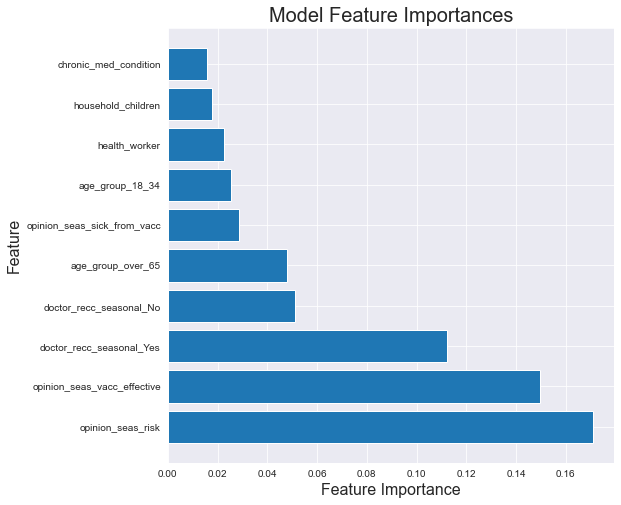

In [52]:
plot_feature_importance(forest_2)

## XG Boost Model

The last model that we will try is XG Boost, the top gradient boosting algorithm.

In [53]:
boost = XGBClassifier(random_state=42)
boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
print('Boost Model Scores: \n', classification_report(y_test, boost.predict(X_test)))

Boost Model Scores: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      3321
           1       0.75      0.74      0.75      2936

    accuracy                           0.77      6257
   macro avg       0.76      0.76      0.76      6257
weighted avg       0.77      0.77      0.77      6257



In [97]:
# Use a grid search to find optimum parameters
boost_param_grid = {'learning_rate' : [.1, .2, .3],
                   'max_depth' : [4, 5, 6],
                   'min_child_weight' : [.5, .7, 1],
                   'n_estimators' : [100, 150, 200]}

gs_boost = GridSearchCV(boost, boost_param_grid, cv=3)
gs_boost.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [98]:
gs_boost.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 0.7,
 'n_estimators': 100}

In [55]:
# Create a second model with best parameters
boost_2 = XGBClassifier(random_state=42, 
                            learning_rate=.1, 
                            max_depth = 4, 
                            min_child_weight = .7, 
                            n_estimators = 100)
boost_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=0.7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
print('Boost Model Scores: \n', classification_report(y_test, boost.predict(X_test)))
print('Second Boost Model Scores: \n', classification_report(y_test, boost_2.predict(X_test)))

Boost Model Scores: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      3321
           1       0.75      0.74      0.75      2936

    accuracy                           0.77      6257
   macro avg       0.76      0.76      0.76      6257
weighted avg       0.77      0.77      0.77      6257

Second Boost Model Scores: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      3321
           1       0.77      0.76      0.76      2936

    accuracy                           0.78      6257
   macro avg       0.78      0.78      0.78      6257
weighted avg       0.78      0.78      0.78      6257



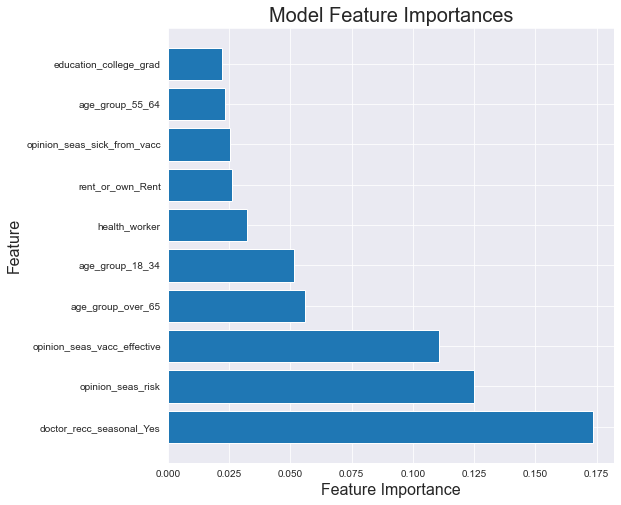

In [58]:
# Look at the top 10 most important features
plot_feature_importance(boost_2)

## Comparing Model Scores

In [60]:
print('Baseline Model Scores: \n', classification_report(y_test, logreg.predict(X_test)))
print('Second Decision Tree Model Scores: \n', classification_report(y_test, clf_2.predict(X_test)))
print('Second Forest Model Scores: \n', classification_report(y_test, forest_2.predict(X_test)))
print('Second Boost Model Scores: \n', classification_report(y_test, boost_2.predict(X_test)))

Baseline Model Scores: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      3321
           1       0.77      0.74      0.76      2936

    accuracy                           0.78      6257
   macro avg       0.78      0.77      0.77      6257
weighted avg       0.78      0.78      0.78      6257

Second Decision Tree Model Scores: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      3321
           1       0.80      0.67      0.72      2936

    accuracy                           0.76      6257
   macro avg       0.77      0.76      0.76      6257
weighted avg       0.77      0.76      0.76      6257

Second Forest Model Scores: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      3321
           1       0.77      0.75      0.76      2936

    accuracy                           0.78      6257
   macro avg       0.78      0.78   

Although all of our models are very similar, our XG Boost model slightly outperformed all the others.